In [28]:
import pandas as pd
import numpy as np

In [64]:
cols = ["method", "time", "grid_length", "cell_quantity", "particle_quantity", "particle_radius", "cutoff_radius"]
results = pd.read_csv("../results2023-03-13:11:58.csv", header=1, names=cols)
results['cell_quantity'] = results['cell_quantity'].astype('int')
results.drop(index=results.index[:2],inplace=True)
results

,method,time,grid_length,cell_quantity,particle_quantity,particle_radius,cutoff_radius
2,PeriodicGridHalfDistance,268662940.0,20.0,1,1000,1.0,1.0
3,NoPeriodicGrid,129347896.0,20.0,1,1000,1.0,1.0
4,PeriodicGridHalfDistance,183113937.0,20.0,1,1000,1.0,1.0
5,NoPeriodicGrid,152658026.0,20.0,1,1000,1.0,1.0
6,PeriodicGridHalfDistance,125595758.0,20.0,1,1000,1.0,1.0
...,...,...,...,...,...,...,...
374,PeriodicGridHalfDistance,9085195.0,20.0,19,1000,1.0,1.0
375,NoPeriodicGrid,8760154.0,20.0,19,1000,1.0,1.0
376,PeriodicGridHalfDistance,8311985.0,20.0,19,1000,1.0,1.0
377,NoPeriodicGrid,7447772.0,20.0,19,1000,1.0,1.0


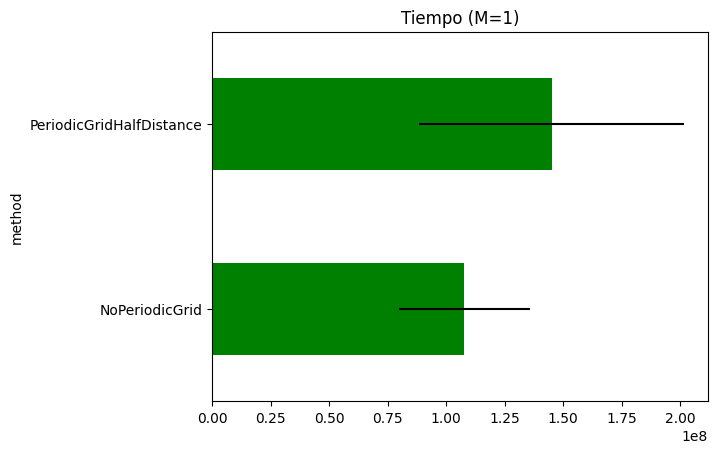

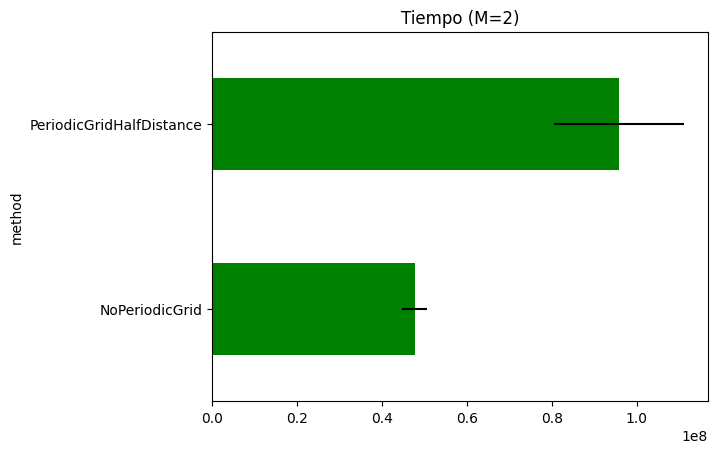

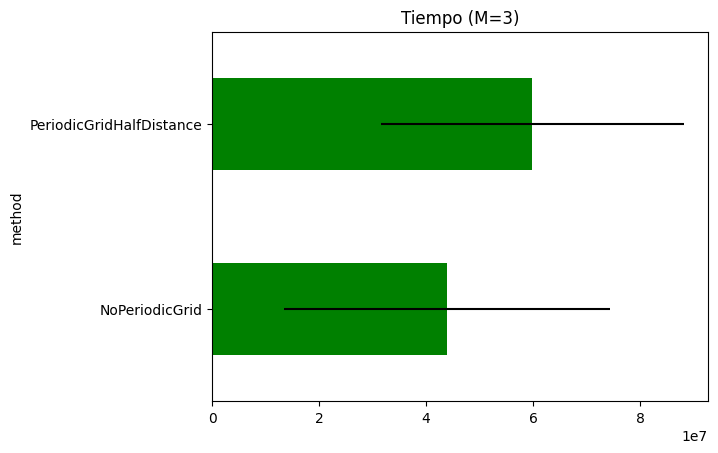

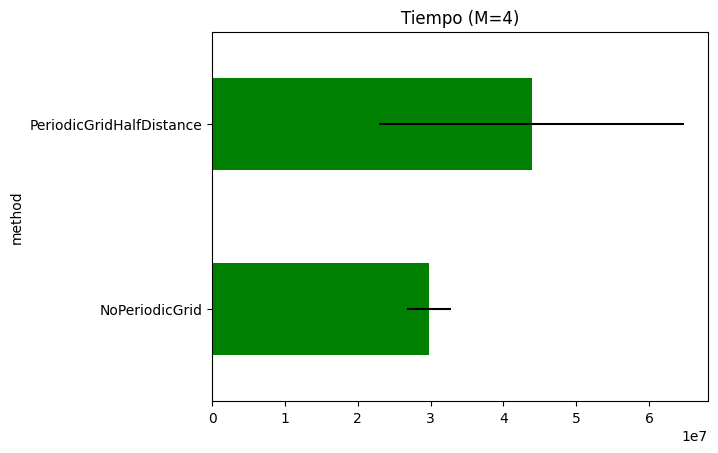

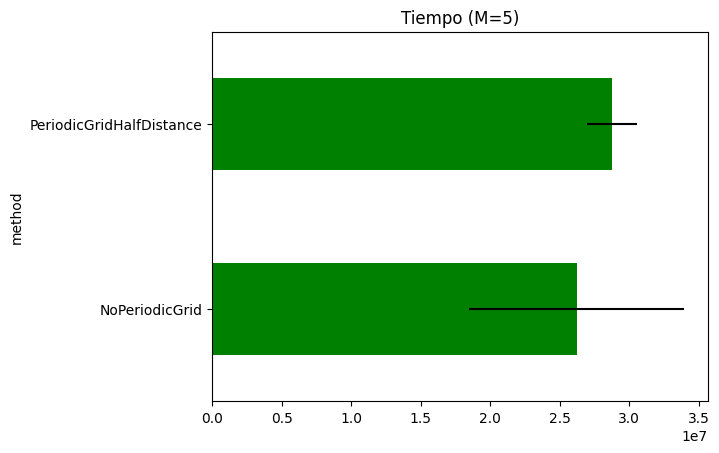

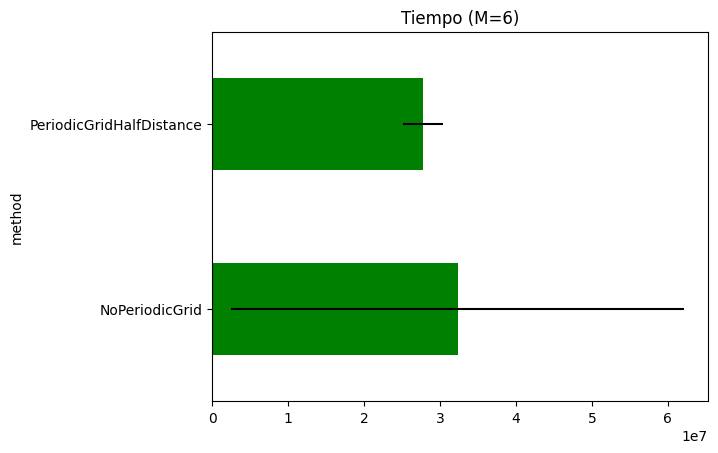

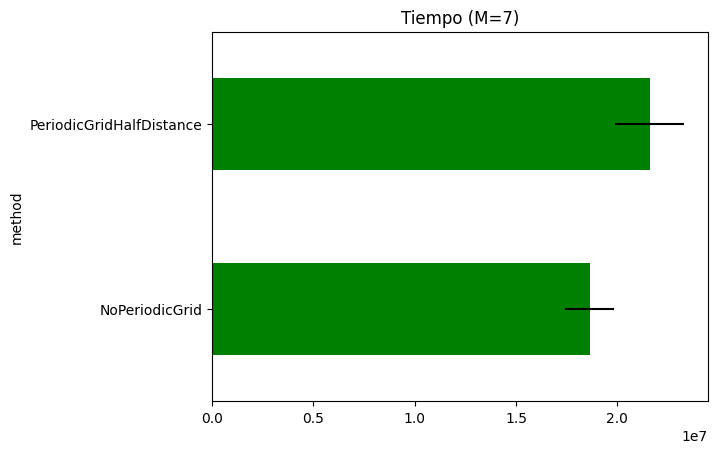

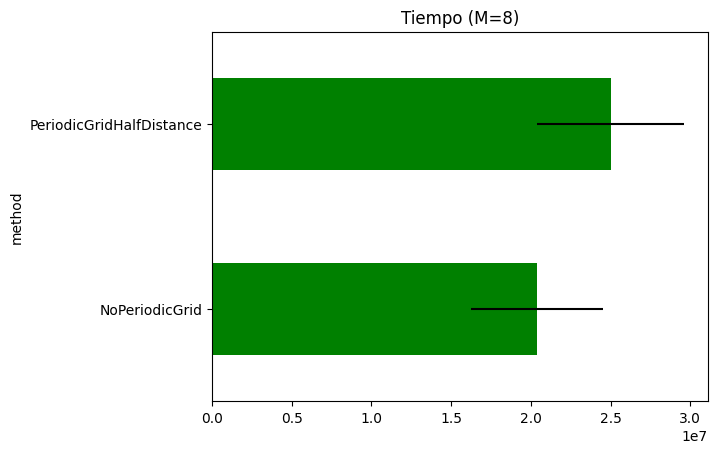

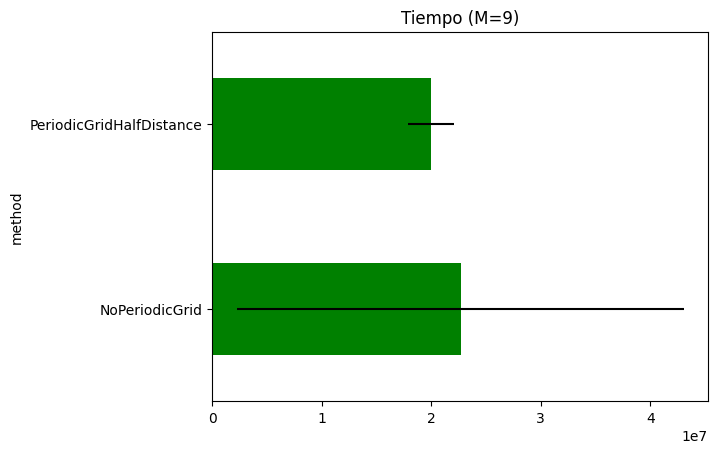

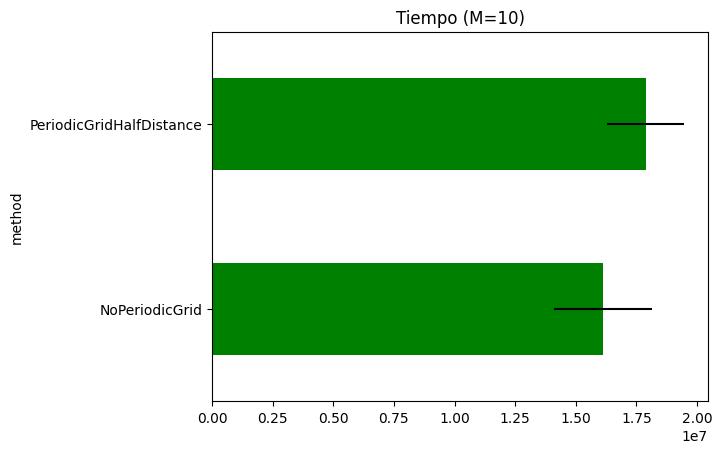

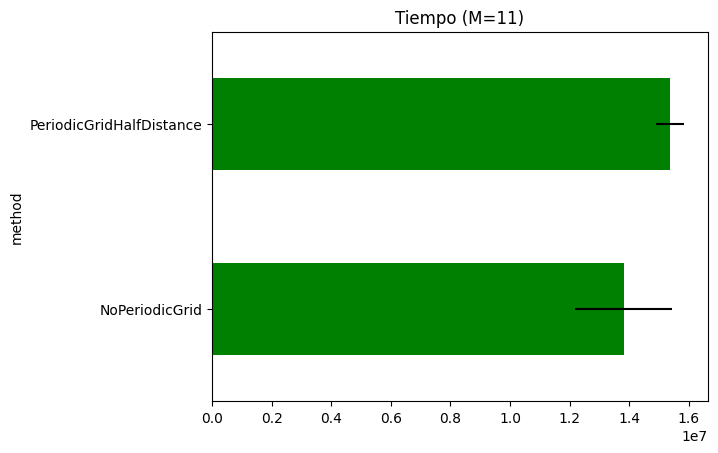

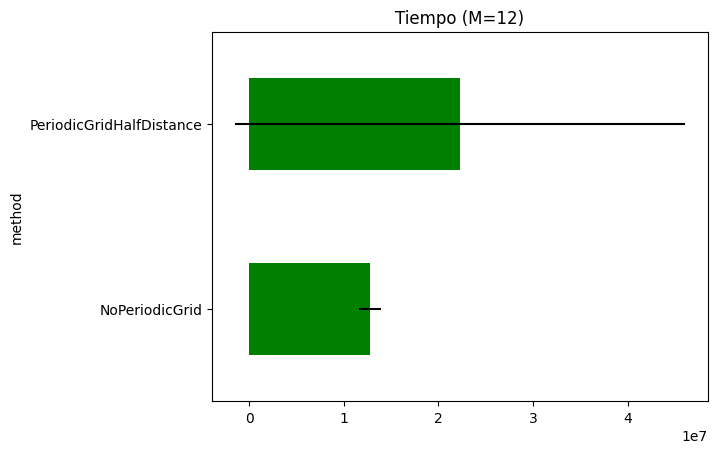

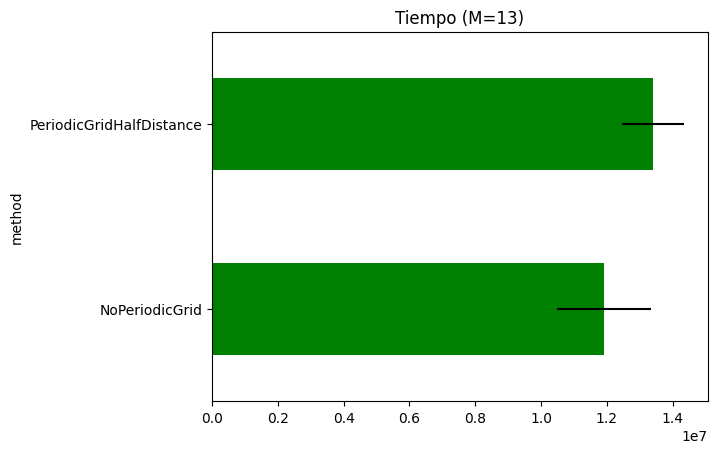

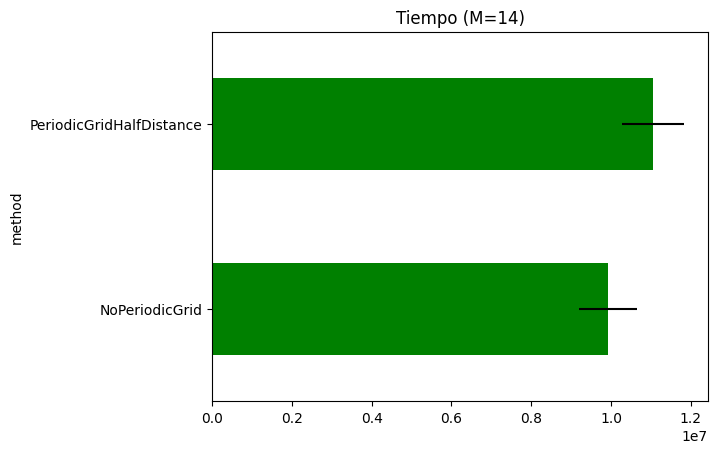

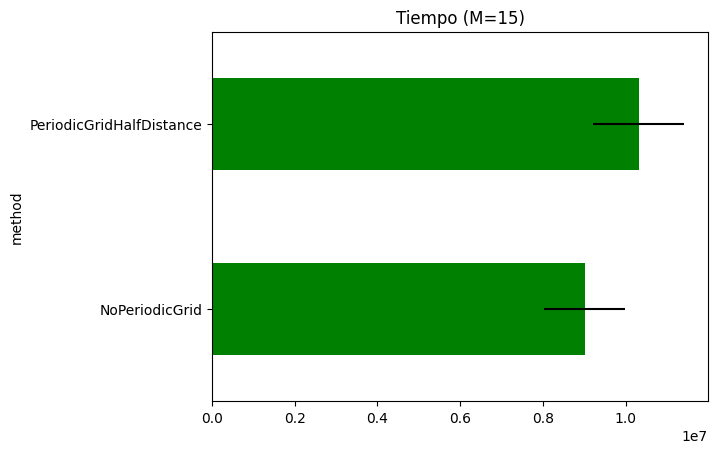

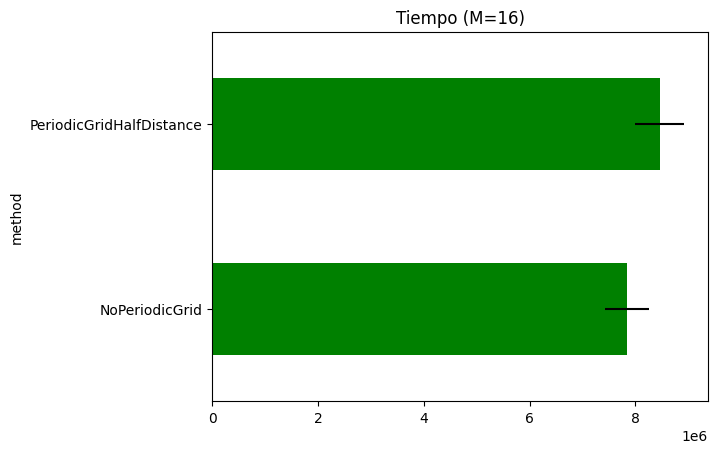

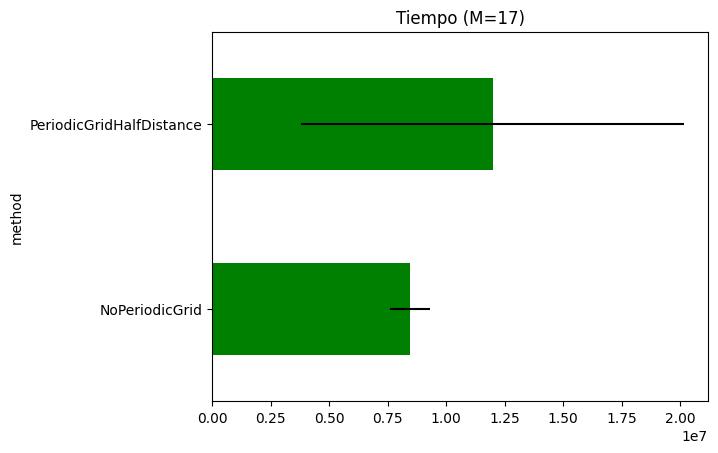

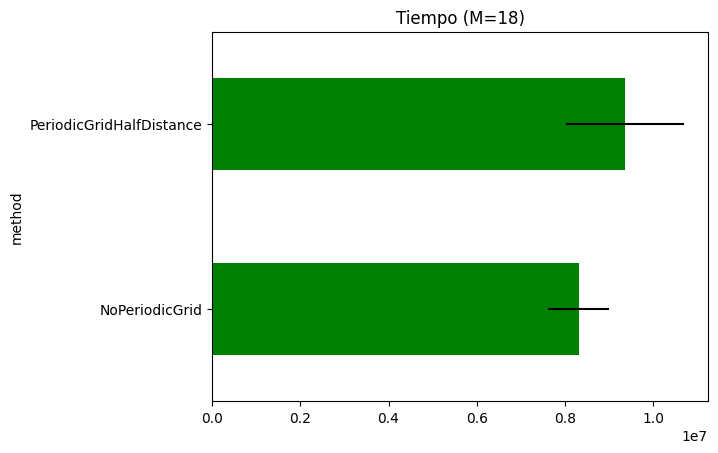

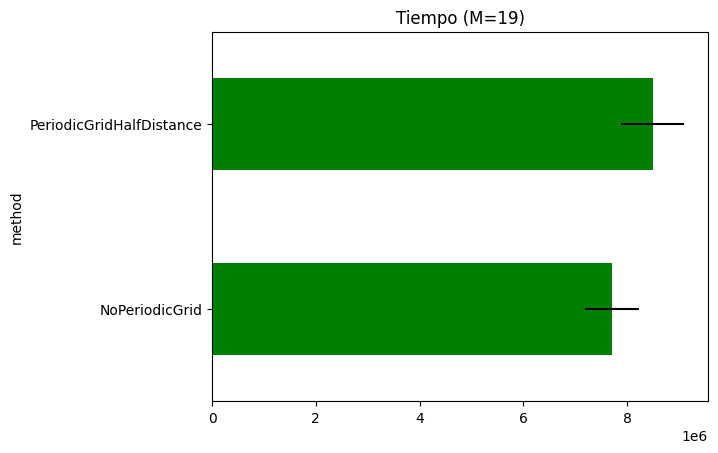

In [67]:
cell_quantities = results['cell_quantity'].unique()

for cell_quantity in cell_quantities:
    mean_and_std = results[results['cell_quantity'] == cell_quantity].groupby("method").agg([np.mean, np.std])
    mean_and_std['time']
    mean_and_std['time'].plot(kind = "barh", y = "mean", legend = False,
                              xerr = "std", title = f"Tiempo (M={cell_quantity})", color='green')

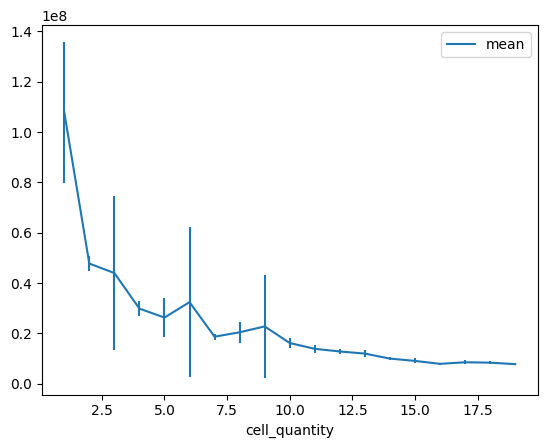

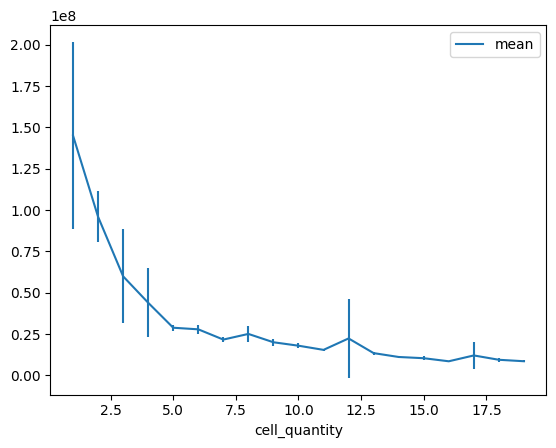

In [79]:
mean_and_std = results.groupby(["method", "cell_quantity"]).agg([np.mean, np.std])
# mean_and_std['time'].plot('cell_quantity', 'cell_quantity')
series = mean_and_std['time'].reset_index()

for method in ['NoPeriodicGrid', 'PeriodicGridHalfDistance']:
    series[series['method'] == method].plot('cell_quantity', 'mean', yerr='std')